                                       ANALISIS EXPLORATORIO DE LOS DATOS -- EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Abre el archivo.

In [3]:
from powerbiclient import Report, models

In [4]:
import warnings

# Your code that triggers the warning

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.styles.stylesheet")


In [40]:
df_internet = pd.read_excel('PenetraciondelInternetfijoporprovinciaaccesosporcada100hogares_2917941698851677186.xlsx')

Fijamos la informacion que tiene. 

In [41]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


- Conclusion: se puede ver que contiene 4 colummnas ( año - trimestre -provinicia - accesos por cada 100 hogares). Y el archivo tiene una dimension de 27.1 KB. 

Vemos en forma de tabla atraves de pandas.

In [25]:
df_internet

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


- Conclusion: se puede ver hay 864 registros.

-----------------------------------------------------------------------------

## Datos faltantes

In [8]:
valores_faltantes_totales = df_internet.isna().any().any()
if valores_faltantes_totales:
    print("Hay valores faltantes en el DataFrame.")
else:
    print("No hay valores faltantes en el DataFrame.")

# Para verificar si hay valores faltantes en columnas específicas:
valores_faltantes_columna1 = df_internet['Año'].isna().any()
valores_faltantes_columna2 = df_internet['Trimestre'].isna().any()
valores_faltantes_columna3 = df_internet['Provincia'].isna().any()
valores_faltantes_columna4 = df_internet['Accesos por cada 100 hogares'].isna().any()

if valores_faltantes_columna1:
    print("Hay valores faltantes en 'Año'.")
else:
    print("No hay valores faltantes en 'Año'.")

if valores_faltantes_columna2:
    print("Hay valores faltantes en 'Trimestre'.")
else:
    print("No hay valores faltantes en 'Trimestre'.")

if valores_faltantes_columna3:
    print("Hay valores faltantes en 'Provincia'.")
else:
    print("No hay valores faltantes en 'Provincia'.")

if valores_faltantes_columna4:
    print("Hay valores faltantes en 'Accesos por cada 100 hogares'.")
else:
    print("No hay valores faltantes en 'Accesos por cada 100 hogares'.")

No hay valores faltantes en el DataFrame.
No hay valores faltantes en 'Año'.
No hay valores faltantes en 'Trimestre'.
No hay valores faltantes en 'Provincia'.
No hay valores faltantes en 'Accesos por cada 100 hogares'.


- Conclusion: no hay valores faltantes en el DataFrame. 

---------------------------------

## Datos duplicados

In [9]:
hay_duplicados = df_internet.duplicated().any()

if hay_duplicados:
    print("Hay datos duplicados en el DataFrame.")
else:
    print("No hay datos duplicados en el DataFrame.")

No hay datos duplicados en el DataFrame.


- Conclusion: No hay datos duplicados en el DataFrame.

--------------------------------------------------

## Datos atipicos (outlaires)

In [12]:
df_internet['Accesos por cada 100 hogares'] = pd.to_numeric(df_internet['Accesos por cada 100 hogares'], errors='coerce')


In [13]:
non_numeric_values = df_internet[~df_internet['Accesos por cada 100 hogares'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
print("Valores no numéricos:", non_numeric_values['Accesos por cada 100 hogares'].unique())


Valores no numéricos: [nan]


In [14]:
# Calcular el primer y tercer cuartil
Q1 = df_internet['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = df_internet['Accesos por cada 100 hogares'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1


In [15]:

# Definir los límites inferior y superior para identificar datos atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar datos atípicos
outliers = df_internet[(df_internet['Accesos por cada 100 hogares'] < lower_limit) | (df_internet['Accesos por cada 100 hogares'] > upper_limit)]

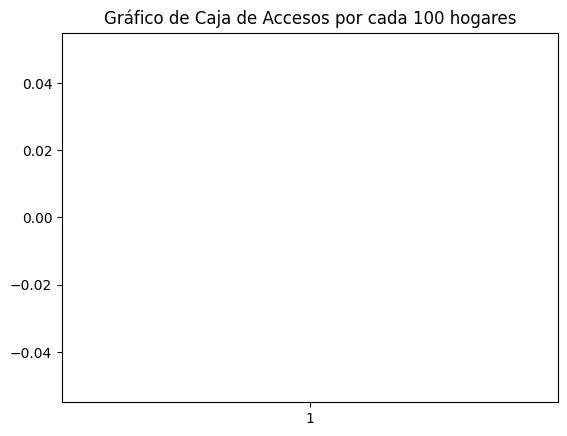

Valores atípicos:
Empty DataFrame
Columns: [Año, Trimestre, Provincia, Accesos por cada 100 hogares]
Index: []


In [16]:
# Visualizar un gráfico de caja
plt.boxplot(df_internet['Accesos por cada 100 hogares'])
plt.title("Gráfico de Caja de Accesos por cada 100 hogares")
plt.show()

print("Valores atípicos:")
print(outliers)

- Conclsuion: no hay datos atipicos. 

---------

Informe final: 
- NO se encontraron, ni datos faltantes, ni datos duplicados, ni tampoco datos atipicos(outalires).

- Se puede interprentar la respuesta de froma cualitativa ya que al no a ver anomalias en todo el **EDA**, se puede deducir que hay una respuesta **Nominal** que es que no hay errores. 

-------------------------------------------------

## Se hace un analisis del ultimo año por cada trimestre.

Se redondean los numeros para poder generar los graficos.

In [59]:
# Eliminar las comas y convertir la columna 'Accesos por cada 100 hogares' a números (floats)
df_internet['Accesos por cada 100 hogares'] = df_internet['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
# Redondear la columna 'Accesos por cada 100 hogares' hacia arriba o abajo
df_internet['Accesos por cada 100 hogares'] = df_internet['Accesos por cada 100 hogares'].apply(lambda x: round(x))

- Primer trimestre del 2022

Tabla

In [60]:
df_uno= df_internet[(df_internet['Trimestre'] == 1) & (df_internet['Año'] == 2022)]
df_uno

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
72,2022,1,Buenos Aires,76
73,2022,1,Capital Federal,112
74,2022,1,Catamarca,58
75,2022,1,Chaco,44
76,2022,1,Chubut,88
77,2022,1,Córdoba,86
78,2022,1,Corrientes,48
79,2022,1,Entre Ríos,64
80,2022,1,Formosa,35
81,2022,1,Jujuy,58


Grafico

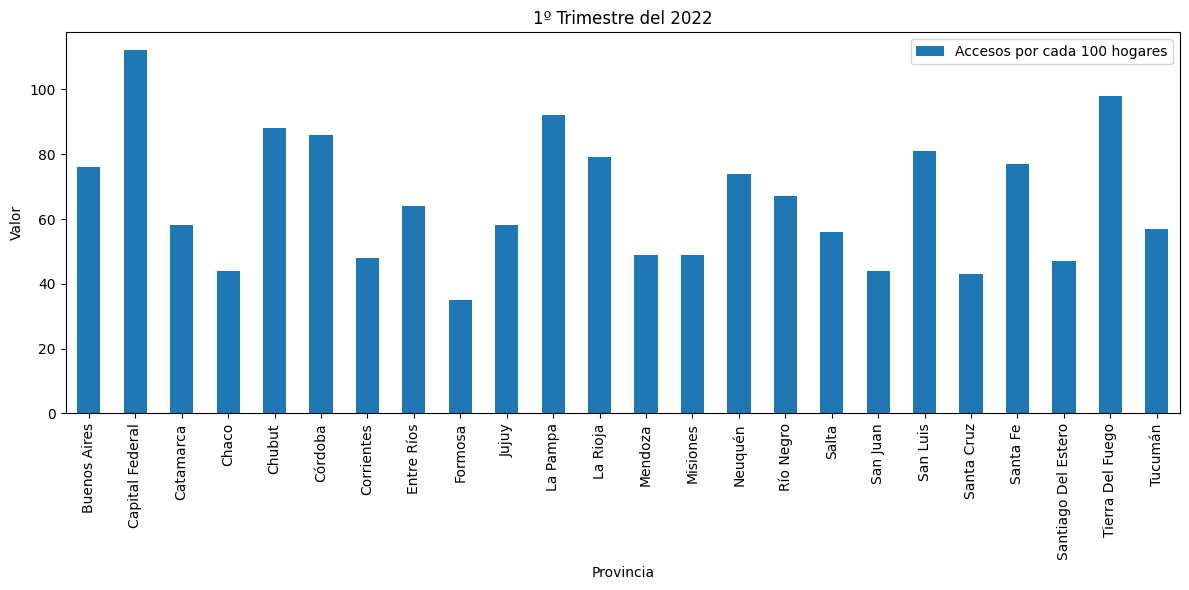

In [77]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
df_uno.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('1º Trimestre del 2022')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Segundo trimestre del 2022

Tabla

In [65]:
df_dos = df_internet[(df_internet['Trimestre'] == 2) & (df_internet['Año'] == 2022)]
df_dos

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
48,2022,2,Buenos Aires,78
49,2022,2,Capital Federal,121
50,2022,2,Catamarca,62
51,2022,2,Chaco,44
52,2022,2,Chubut,83
53,2022,2,Córdoba,87
54,2022,2,Corrientes,48
55,2022,2,Entre Ríos,64
56,2022,2,Formosa,43
57,2022,2,Jujuy,57


Grafico

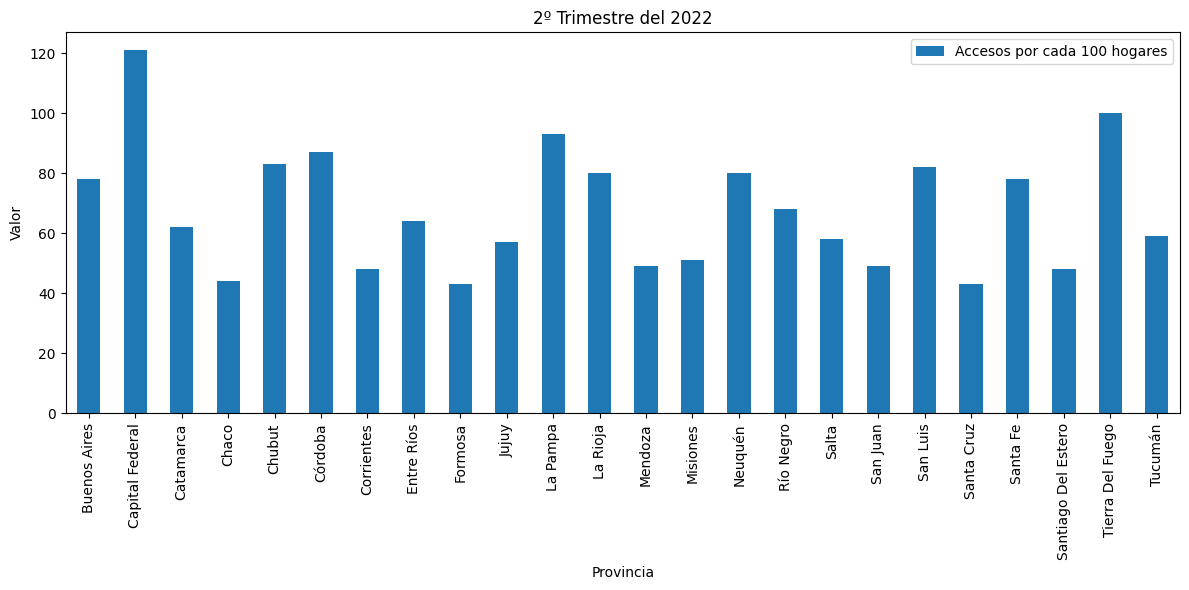

In [78]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
df_dos.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('2º Trimestre del 2022')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Tercer trimestre del 2022

Tabla

In [68]:
df_tres = df_internet[(df_internet['Trimestre'] == 3) & (df_internet['Año'] == 2022)]
df_tres

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
24,2022,3,Buenos Aires,78
25,2022,3,Capital Federal,122
26,2022,3,Catamarca,65
27,2022,3,Chaco,44
28,2022,3,Chubut,84
29,2022,3,Córdoba,88
30,2022,3,Corrientes,48
31,2022,3,Entre Ríos,64
32,2022,3,Formosa,44
33,2022,3,Jujuy,59


Grafico

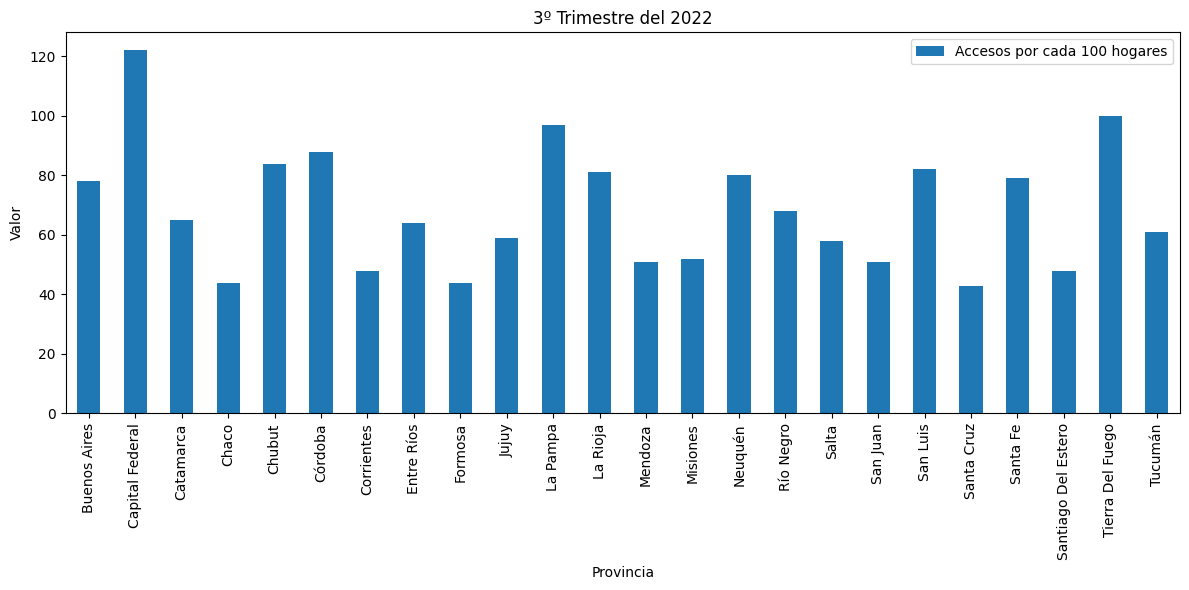

In [79]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
df_tres.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('3º Trimestre del 2022')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

- Cuarto trimestre del 2022

Tabla

In [71]:
df_cuatro = df_internet[(df_internet['Trimestre'] == 4) & (df_internet['Año'] == 2022)]
df_cuatro

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,79
1,2022,4,Capital Federal,123
2,2022,4,Catamarca,66
3,2022,4,Chaco,44
4,2022,4,Chubut,86
5,2022,4,Córdoba,89
6,2022,4,Corrientes,52
7,2022,4,Entre Ríos,64
8,2022,4,Formosa,39
9,2022,4,Jujuy,58


Grafico

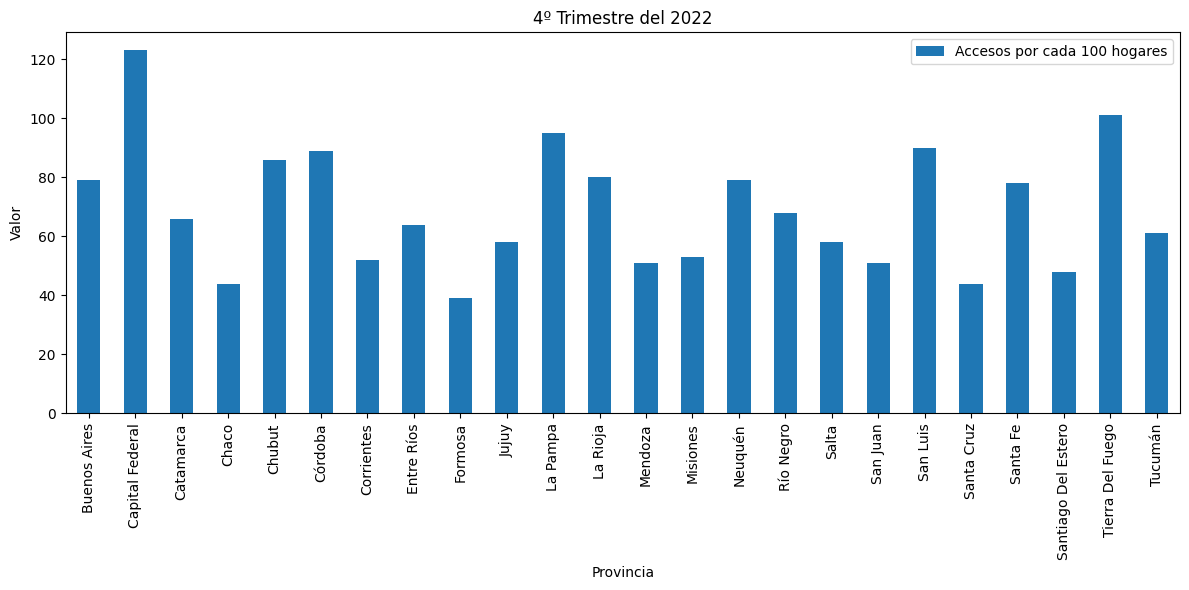

In [80]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
df_cuatro.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('4º Trimestre del 2022')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

-----------------------------------------------


- Conclusión: Al analizar las tablas y gráficos, se observa que las provincias con un acceso más destacado a Internet son Capital Federal (CABA) y Tierra Del Fuego. En contraste, se identifica que Formosa y Santiago Del Estero presentan un acceso relativamente menor.